# Chapter 1 Tutorial

NetworkXを使うとエッジに重みの付いた、あるいは重みのない有向/無向グラフを構築し、描画することができる。グラフを分析するたくさんの機能が利用可能だ。このチュートリアルでは、いくつかの基礎的な解析例を学び、演習していく。

ここで、多くの練習問題の後に `assert` 文を含むブロックがあることに注意されたい。この `assert` 文の前にセットアップコードがある場合がある。これはあなたが正しい道にいるというフィードバックを与えるために設置されている。もし `AssertionError` を受け取ったら、おそらくどこかに間違いがあるということだ。

[このチュートリアルで使用したnetworkxの公式ドキュメント（v2.2）](https://networkx.github.io/documentation/networkx-2.2/)

[このチュートリアルで使用したnetworkxの公式チュートリアル（v2.2）](https://networkx.github.io/documentation/networkx-2.2/tutorial.html)

## `import` について

`import` はコードの一番上に書くと、Python に外部モジュールを読み込むように指示してくれる。ここでは、NetworkXを読み込みたいが、今後繰り返し入力することになるので、`as`によって短いエイリアス `nx` として読み込む。

`%`で始まる行はPythonのコードではなく、Jupyter notebookのための "マジック コマンド"である。`%matplotlib inline` マジックは Jupyter Notebook にインラインで、つまりノートブックの中にグラフィックを描画するように指示する。このマジックはimport文のすぐ後に使用する必要がある。

In [1]:
import networkx as nx
%matplotlib inline

インストールされたNetworkXのバージョンを確認しよう。バージョン２はv1と互換性がない。よって、自分たちが有効期限が切れたパッケージを使っていないか確認する必要がある。

In [2]:
nx.__version__

'2.7.1'

## 無向グラフの作成と描画

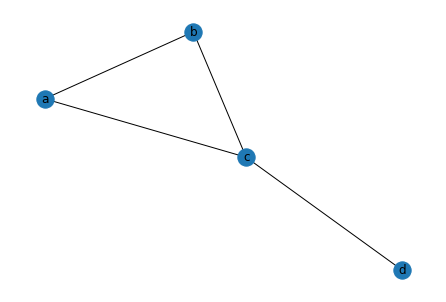

In [3]:
# 「単純な」グラフは無向グラフ
G = nx.Graph()

# 個々のノードに名前を付ける。ここでは文字列を指定。
G.add_node('a')

# add_nodes_fromメソッドはシークエンスからノードを追加する。ここではリストを指定。
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# 'a'から'b'へのエッジを追加
# ここでは無向グラフを考えているため、順番は関係ない
G.add_edge('a', 'b')

# add_nodes_from同様に、エッジもシークエンスから追加できる
#エッジはタプルで指定する
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

#グラフを描画
nx.draw(G, with_labels=True)

グラフの見た目を変えるために、描画関数にはオプションとしてたくさんの引数が用意されている。

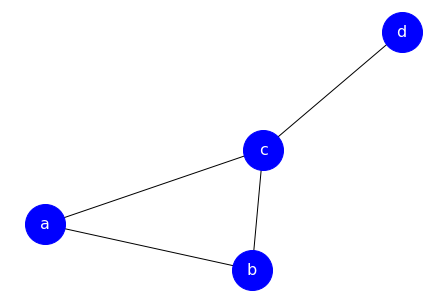

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

## 命名における慣習について

通常、Pythonでは変数の名前は `snake_case` で、つまりアンダースコアで単語を区切って小文字で命名する。クラス名は慣例的に `CamelCase` で、つまり各単語の最初の文字を大文字にして命名する。

明らかにNetworkXはこの慣習に従っておらず、しばしばグラフの名前に大文字を1つだけ使う。これは離散数学の世界から引き継がれた慣習の一例である。オンラインで見られるドキュメントのほとんどはこの規則を使っているので、私たちもそれに従う。

## グラフメソッド

グラフオブジェクトは様々なプロパティとメソッドを持っており、それを使えばグラフ全体についてのデータを取得できる。

In [5]:
# すべてのノードを列挙する
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [6]:
#すべてのエッジを列挙する
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

`NodeView` オブジェクトと `EdgeView` オブジェクトはイテレータなので、`for` ループで繰り返し処理ができる。

In [7]:
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


エッジがタプルとして与えられたことに注意されたい。私たちは上のコードセルで同じように入力した。

`number_of_` メソッドでグラフが持つノードとエッジの数を取得できる。

In [9]:
G.number_of_nodes()

4

In [10]:
G.number_of_edges()

4

グラフメソッドの中にはエッジやノードを引数に取るものもある。それらは引数に与えられたエッジやノード自体のプロパティを返すメソッドだ。たとえば、`.neighbors()` メソッドは引数に指定したノードの隣接ノードを返す。

In [11]:
# ノード'b'の隣接ノードを列挙する
G.neighbors('b')

networkxの仕様上、多くのグラフメソッドはリストの代わりにイテレータを返す。これは次のように繰り返し処理を行えて便利だ。

In [12]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


もしイテレータをリストに変換したければ、`list` コンストラクタを使えば良い。

In [13]:
list(G.neighbors('b'))

['a', 'c']

## NetworkX の関数 vs. グラフメソッド

これまでのデータはグラフ**メソッド**を介して使用できた。つまり、グラフというオブジェクトにメソッドを作用させて欲しいデータを取得してきた。

    G.<メソッド名>(<引数>)
    
NetworkX の最もよく使われる関数のいくつかはメソッドとして提供されているが、それ以外の多くの関数はモジュール関数であり、次のようにして呼び出される。

    nx.<関数名>(G, <引数>)

つまり、グラフGが最初の、そしておそらく唯一の引数として与えられる。以下に、グラフGに関する情報を返す NetworkX モジュールの関数の例をいくつか示す。

In [14]:
# グラフGが木構造かどうか
nx.is_tree(G)

False

In [15]:
# グラフGが連結しているか
nx.is_connected(G)

True

## ノードとエッジの存在を確認

`has_node()` メソッドを使ってグラフに特定のノードがあるかを確認することができる。

In [16]:
G.has_node('a')

True

In [17]:
G.has_node('x')

False

さらに、上で使用した繰り返し構文（ `for n in G.nodes` ）でも、グラフに特定のノードがあるか確認することができる。

In [18]:
'd' in G.nodes

True

同様にして、特定の2つのノードがエッジで繋がっているかを確認できる。

In [19]:
G.has_edge('a', 'b')

True

In [20]:
G.has_edge('a', 'd')

False

In [21]:
('c', 'd') in G.edges

True

## ノードの次数

グラフ上の任意のノードに対して問うことのできる重要な問題の一つは、それが何個の他のノードと繋がっているかである。上で使用した `.neighbors()` メソッドを使えば、この問題を次のように定式化できる。

In [22]:
len(list(G.neighbors('a')))

2

しかし、次数を問うことはよく実行される処理なので、NetworkX はこれをより明確な形で行えるようグラフメソッドを用意している。

In [23]:
G.degree('a')

2

## 練習問題 1

木構造において、次数が1のノードはしばしば *leaf* と呼ばれる。引数にグラフを取りノードに対して繰り返し処理を行って次数が1のノードのリストを返す関数 `get_leaves()` を書け。

In [24]:
def get_leaves(G):
    ls = []
    for n in G.nodes:
        if G.degree(n) == 1:
            ls.append(n)
    
    return ls

In [25]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
assert set(get_leaves(G)) == {'c', 'b'}

## 補足：内包表記

しばしば、一続きの値からその各要素に対してある操作を行って新しい一続きの値を生成したいときがある。リストの内包表記とジェネレータ式は、これを行うためのコンパクトな方法である。

リストの内包表記は角括弧 `[]` の中で記述され、即座に処理が実行されたリストを生成する。

In [26]:
items = ['spider', 'y', 'banana']

[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

NetworkX の文脈では、内包表記はノードやエッジのリストに対してよく使用される。

In [27]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


ジェネレータ式は、[遅延評価](https://en.wikipedia.org/wiki/Lazy_evaluation)されるため少し異なる。ジェネレータ式は丸括弧 `()` を使って指定する。もし関数の引数として表現するのであれば、丸括弧なしで指定することができる。これらは `max` 関数のようなアグリゲーションの文脈で最もよく使用される。

In [28]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [29]:
max(len(item) for item in items)

6

In [30]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

## ノードの名前付け

ノード名は1文字である必要はなく、文字列、整数、イミュータブルなオブジェクトのいずれでもよく、データ型も混在できる。以下の例では、文字列と整数を名前に使っている。

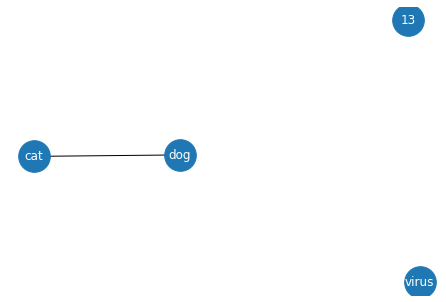

In [31]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

## 隣接リスト

グラフをコンパクトに表現する方法のひとつに隣接リストがある。これは、有向・無向を問わず、重みのないグラフに最も有効である。隣接リストでは、各行がいくつかのノード名を含んでいる。最初のノード名が「ソース」で、その行の他の各ノード名が「ターゲット」である。たとえば、次のような隣接リストがあるとする。
```
a d e
b c
c
d
e
```
このとき、エッジは以下のようになる。
```
(a, d)
(a, e)
(b, c)
```
隣接リストの独自の線上にノードが存在するのは、孤立ノードを確実に含むためである。グラフが無向であれば、各エッジにつき1つの方向を指定するだけでよいことに注意されたい。重要なのは、グラフが有向か無向かはファイル自体に書かれていないことが多いので、それを推測しなければならないことだ。これは、この形式の限界の一つである。

`datasets` ディレクトリの中に、 `friends.adjlist` というファイルがある。ただのテキストファイルなので、パソコンでもGitHubでも開くことができるが、ここでその中身を確認する。

In [33]:
print(open('../datasets/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX は隣接リストからグラフを読み取る方法として、`nx.read_adjlist()` を提供している。このグラフを `SG`（social graph）と名づけることにする。

In [34]:
SG = nx.read_adjlist('../datasets/friends.adjlist')

このグラフを描画すると

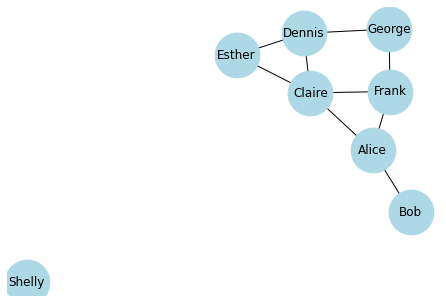

In [35]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

任意のノードに繋がっている友だちの数のような情報を知る方法はすでに学んだ。

In [36]:
SG.degree('Alice')

3

## 練習問題2

引数にグラフオブジェクトを取り、最大次数を持つノードの名前とその次数をタプル形式で返す関数 `max_degree()` を書け。

In [53]:
def max_degree(G):
    degree = dict(G.degree())
    max_deg = max(list(degree.values()))
    return [(k, v)for k, v in degree.items() if v == max_deg][0]

In [54]:
SG = nx.read_adjlist('../datasets/friends.adjlist')
assert max_degree(SG) == ('Claire', 4)

## 練習問題3

引数にグラフオブジェクトと2つのノードを取り、与えられた両方のノードにつながっているノードを格納したリスト（ないし集合）を返す関数 `mutual_friends()` を書け。たとえば、上で描画したグラフ `SG` では

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

2つのノードが共通の友人を持たない場合（e.g. `SG` におけるGeorgeとBob）は、空のリストあるいは集合が返り値となる。

In [ ]:
def mutual_friends(G, node_1, node_2):
    

In [ ]:
SG = nx.read_adjlist('../datasets/friends.adjlist')
assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(SG, 'George', 'Bob') == []
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

## 有向グラフ

特に指定がない限り、グラフのエッジは無向――つまり対称的で双方向性をもつ――であるものとする。しかし、捕食者と被食者の関係などは非対称であり、有向グラフとして表現するのが最適である。NetworkX は有向グラフのために `DiGraph` クラスを提供している。

In [ ]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

`has_edge()` のようなエッジを扱うグラフメソッドにおける非対称性に注意しよう。

In [ ]:
D.has_edge(1,2)

In [ ]:
D.has_edge(2,1)

無向グラフで対称的な関係を示す"neighbors"の代わりに、有向グラフのノードは `predecessors` （ノードに入ってくるneighbors）と `succcessors` （ノードから出ていくneighbors）をもつ。

In [ ]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

有向グラフは入次数（in-degree）と出次数（out-degree）をもち、それぞれ注目するノードに入ってくるエッジ数と出ていくエッジ数に対応している。

In [ ]:
D.in_degree(2)

In [ ]:
D.out_degree(2)

## 注意事項

NetworkX 2 以降、有向グラフの `.degree()` メソッドは、入次数と出次数の合計の次数を与える。しかし、少し紛らわしい命名法だが、 `neighbors` メソッドは `successors` と同義で、注目するノードから出ていくエッジのみを与える。これは、 `neighbors` が与えられたノードからリンクをたどって到達できるすべてのノードであると考えれば理解できるが、この紛らわしさのせいで本当は `predecessors` と `successors` の両方が欲しいのに、コードに `.neighbors()` と書いてしまうミスが生じやすくなっている。

In [ ]:
D.degree(2)

In [ ]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))